In [14]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
  
# fetch dataset 
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
  
# data (as pandas dataframes) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets 

In [15]:
#Przygotowanie danych:
#Kolumny do zmapowania

bialy_krol_kolumna = X['white-king-file']
biala_wieza_kolumna= X['white-rook-file']
czarny_krol_kolumna = X['black-king-file']

In [16]:
mapowanie_X = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}
mapowanie_Y = {'draw': -1, 'zero':0,'one': 1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11,'twelve':12,'thirteen':13,'fourteen':14,'fifteen':15,'sixteen':16}

X_num = X.replace(mapowanie_X).infer_objects(copy=False)
Y_num = y.replace(mapowanie_Y).infer_objects(copy=False)

In [17]:
#Pozycja (połączenie rank i file dla wszystkich figur)
X_num["black-king"] = X_num.apply(lambda row: (row["black-king-file"],row["black-king-rank"]),axis=1)
X_num["white-king"] = X_num.apply(lambda row: (row["white-king-file"],row["white-king-rank"]),axis=1)
X_num["white-rook"] = X_num.apply(lambda row: (row["white-rook-file"],row["white-rook-rank"]),axis=1)

X_num = X_num[["black-king","white-king","white-rook"]]

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Jedna ramka polaczona X i Y
df = pd.concat([X_num, Y_num], axis=1)

In [19]:
#Do zadania 2:
#Pozycje figur:
wk_x = df["white-king"].str[0]
wk_y = df["white-king"].str[1]
bk_x = df["black-king"].str[0]
bk_y = df["black-king"].str[1]

#Odległości między białym a czarnym królem w metrykach: 
# euklidesowej, 

df["odl_euklidesowa"] = np.sqrt((wk_x - bk_x)**2 + (wk_y-bk_y)**2)
# Manhattan, 

df["odl_Manhattan"] = np.abs(wk_x - bk_x) + np.abs(wk_y - bk_y)
# Czebyszewa

df["odl_Czebyszewa"] = np.maximum(np.abs(wk_x - bk_x), np.abs(wk_y - bk_y))

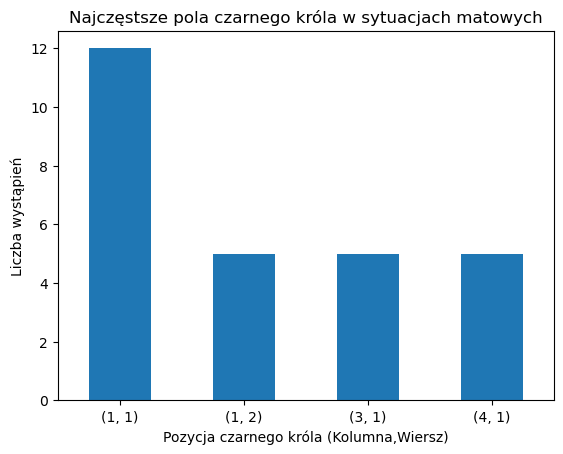

In [20]:
#Zadanie 1:
#Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)?

czarny_krol_mat = df[df["white-depth-of-win"]==0].groupby("black-king").size().sort_values(ascending=False)

#Wizualizacja:

czarny_krol_mat.plot(kind='bar')
plt.title('Najczęstsze pola czarnego króla w sytuacjach matowych')
plt.xlabel('Pozycja czarnego króla (Kolumna,Wiersz)')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.show()

#Komentarz: 
# 
# Matowanie czarnego króla jest możliwe wyłącznie na krawędziach lub w rogach planszy - wszystkie 27 przypadków matu w zbiorze danych występują, 
# gdy czarny król znajduje się w narożniku lub na krawędzi planszy.
# Czarny król w momencie, gdy jest matowany, zwykle znajduje się 
# na pozycji (a,1) - w 12/27 razy, potem w (a,2),(c,1) i (d,1) po 5/27 razy

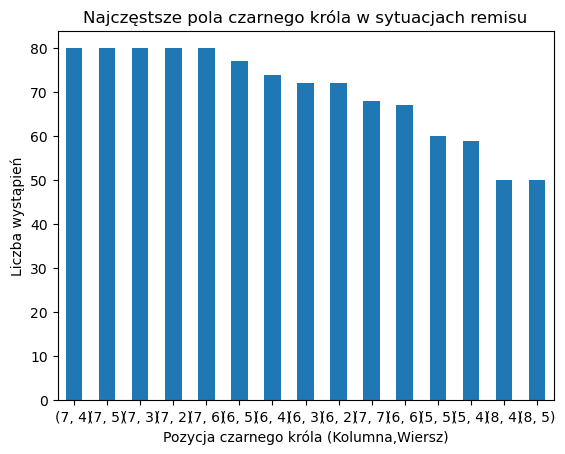

<Figure size 2500x600 with 0 Axes>

In [21]:
#Gdzie znajduje się na planszy czarny król, kiedy gra kończy się remisem (white-depth-of-win=-1)?

czarny_krol_remis = df[df["white-depth-of-win"]==-1].groupby("black-king").size().sort_values(ascending=False).head(15)

#Wizualizacja:

czarny_krol_remis.plot(kind='bar')

plt.title('Najczęstsze pola czarnego króla w sytuacjach remisu')
plt.xlabel('Pozycja czarnego króla (Kolumna,Wiersz)')
plt.ylabel('Liczba wystąpień')
plt.xticks(rotation=0)
plt.figure(figsize=(25,6))
plt.show()

#Komentarz:
# Sytuacje remisowe są znacznie częstsze (2796 przypadków). Widać, że w przeciwieństwie do matów nie występują tylko na brzegach, ale
# często koncentrują się w specyficznych rejonach (np. pola przyległe do pól brzegowych).
# Czarny król w sytuacji remisu najczęściej znajduje się w 7 kolumnie, w wierszach 2-6 (po 80 razy).

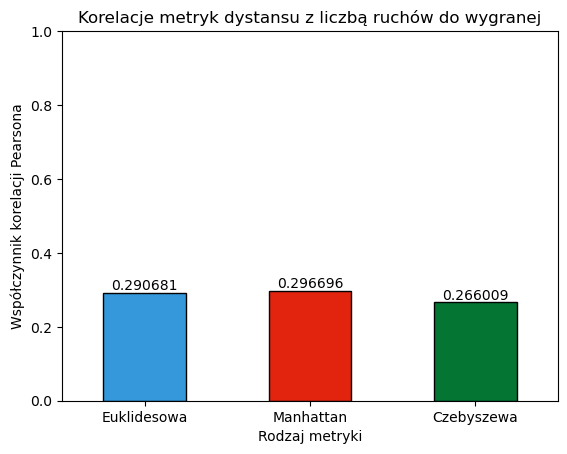

In [22]:
#Zadanie 2

# Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans
# pomiędzy białym królem a czarnym królem. Jaka metryka dystansu 
# (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej 
# oszacować liczbę ruchów do zakończenia gry? Zignoruj sytuacje remisowe

#Korelacja Pearsona między odległością w danej metryce a white-depth-to-win

bez_remisu = df[df["white-depth-of-win"]!=-1].copy()

corr_euklides = bez_remisu["white-depth-of-win"].corr(bez_remisu["odl_euklidesowa"])
corr_Manhattan = bez_remisu["white-depth-of-win"].corr(bez_remisu["odl_Manhattan"])
corr_Czebyszew = bez_remisu["white-depth-of-win"].corr(bez_remisu["odl_Czebyszewa"])

wyniki = {
    "Euklidesowa": corr_euklides,
    "Manhattan": corr_Manhattan,
    "Czebyszewa": corr_Czebyszew
}

#Wizualizacja
serie_wynikow = pd.Series(wyniki)


ax = serie_wynikow.plot(kind='bar', color=['#3498db', "#E2240F", "#047533"], edgecolor='black')
plt.title('Korelacje metryk dystansu z liczbą ruchów do wygranej')
plt.xlabel('Rodzaj metryki')
plt.ylabel('Współczynnik korelacji Pearsona')
plt.ylim(0,1.0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.show()

# Najlepsza metryka zgodnie z korealcją Pearsona do szacowania ilości ruchów do zakończenia gry to metryka Manhattan.
# Wszytskie metryki pokazują niską dodatnią korelację, co pokazując, że dystans między figurami jest tylko jednym z wielu czynników wpływających na długość partii.

In [23]:
#Zadanie 3

# Czy informacja o odległości czarnego króla od krawędzi planszy może być 
# przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej 
# informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania
# może dodatkowo pomóc? Zignoruj sytuacje remisowe.

# Pozycje krancowe to te, w których minimum jedna współrzędna jest równa 1 lub 8

bk_x = df["black-king"].str[0]
bk_y = df["black-king"].str[1]

dist_x = np.minimum(bk_x - 1, 8 - bk_x)
dist_y = np.minimum(bk_y - 1, 8 - bk_y)

df["min_odl_krawedz_Man"] = np.minimum(dist_x, dist_y)
df["min_odl_krawedz_eukl"] = np.sqrt(np.minimum(dist_x, dist_y)**2)
df["min_odl_krawedz_Czeb"] = np.maximum(np.minimum(dist_x, dist_y), 0)

bez_remisu = df[df["white-depth-of-win"]!=-1]

#Wyniki we wszytskich trzech metrykach zawsze równe

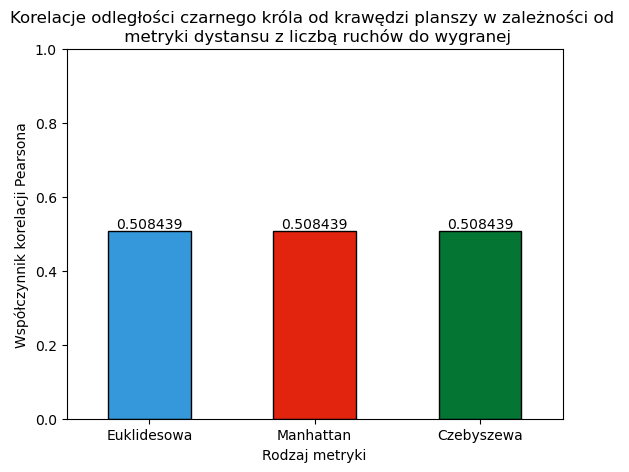

In [24]:
#Czy informacja o odległości czarnego króla od krawędzi planszy może być 
# przydatna w określeniu w ilu ruchach zakończy się gra? - korelacja

corr_krol_brzeg_euklides = bez_remisu["white-depth-of-win"].corr(bez_remisu["min_odl_krawedz_eukl"])
corr_krol_brzeg_Manhattan = bez_remisu["white-depth-of-win"].corr(bez_remisu["min_odl_krawedz_Man"])
corr_krol_brzeg_Czebyszew = bez_remisu["white-depth-of-win"].corr(bez_remisu["min_odl_krawedz_Czeb"])

wyniki = {
    "Euklidesowa": corr_krol_brzeg_euklides,
    "Manhattan": corr_krol_brzeg_Manhattan,
    "Czebyszewa": corr_krol_brzeg_Czebyszew
}

#Wizualizacja
serie_wynikow = pd.Series(wyniki)


ax = serie_wynikow.plot(kind='bar', color=['#3498db', "#E2240F", "#047533"], edgecolor='black')
plt.title('Korelacje odległości czarnego króla od krawędzi planszy w zależności od \n metryki dystansu z liczbą ruchów do wygranej')
plt.xlabel('Rodzaj metryki')
plt.ylabel('Współczynnik korelacji Pearsona')
plt.ylim(0,1.0)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.show()

# Istnieje duża dodatnia korelacja między odległością czarnego króla od krawędzi 
# planszy a ilością ruchów, po których zakończy się gra bez względu na metrykę,
# w której prowadzone są obliczenia

In [27]:
#Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z 
# poprzedniego zadania może dodatkowo pomóc?

bez_remisu.loc[:, 'dystans_calkowity_czeb'] = bez_remisu["odl_Czebyszewa"] + bez_remisu["min_odl_krawedz_Czeb"]
bez_remisu.loc[:, 'dystans_calkowity_eukl'] = bez_remisu["odl_euklidesowa"] + bez_remisu["min_odl_krawedz_eukl"]
bez_remisu.loc[:, 'dystans_calkowity_man'] = bez_remisu["odl_Manhattan"] + bez_remisu["min_odl_krawedz_Man"]

corr_czeb_suma = bez_remisu['dystans_calkowity_czeb'].corr(bez_remisu["white-depth-of-win"])
corr_eukl_suma = bez_remisu['dystans_calkowity_eukl'].corr(bez_remisu["white-depth-of-win"])
corr_man_suma = bez_remisu['dystans_calkowity_man'].corr(bez_remisu["white-depth-of-win"])

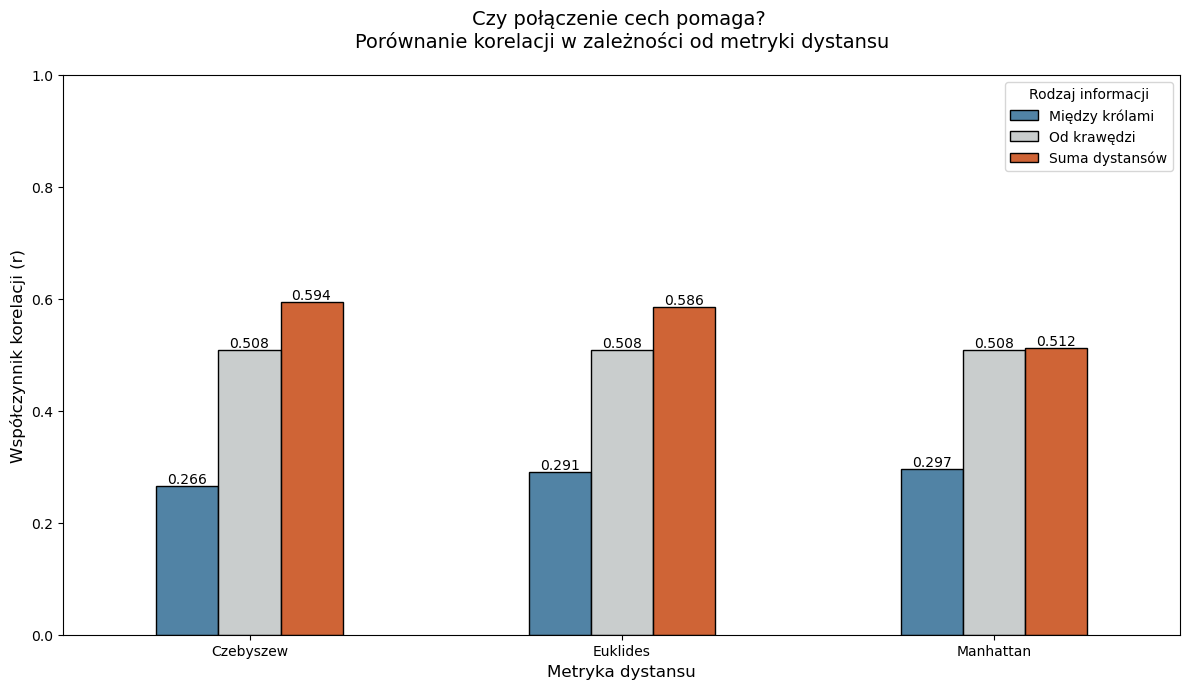

In [26]:
#Wizualizacja:
corr_Czebyszew

dane_wykres = pd.DataFrame({
    'Między królami': [corr_Czebyszew, corr_euklides, corr_Manhattan],
    'Od krawędzi': [corr_krol_brzeg_Czebyszew, corr_krol_brzeg_euklides, corr_krol_brzeg_Manhattan],
    'Suma dystansów': [corr_czeb_suma, corr_eukl_suma, corr_man_suma]
}, index=['Czebyszew', 'Euklides', 'Manhattan'])


ax = dane_wykres.plot(kind='bar', figsize=(12, 7), color=["#004a7cae", "#BDC1C1CE", "#c74710d7"], edgecolor='black')

plt.title('Czy połączenie cech pomaga? \nPorównanie korelacji w zależności od metryki dystansu', fontsize=14, pad=20)
plt.ylabel('Współczynnik korelacji (r)', fontsize=12)
plt.xlabel('Metryka dystansu', fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')
plt.legend(title='Rodzaj informacji')

plt.tight_layout()
plt.show()

# Komentarz:
# Analiza pokazuje, że odległość od krawędzi jest najlepszym wskaźnikiem, uwzględniającym tylko jedną cechę, który pokazuje trudności pozycji. 
# Współczynnik korelacji Pearsona dla tej cechy, wynoszący 0.508, wskazuje, im dalej od krawędzi znajduje się czarny król, tym więcej ruchów potrzeba, aby zakończyć grę.
# Najlepszą dokładność w przewidywaniu, po ilu ruchach skończy się gra daje połączenie informacji: odległości króli od siebie oraz odległość czarnego króla 
# od krawędzi planszy, który dla najlepszej z metryk (Czebyszewa) wyniósł nawet 0.594 .